Simple Harmonic Motion: Period: 1.9219 s, Frequency: 0.5203 Hz


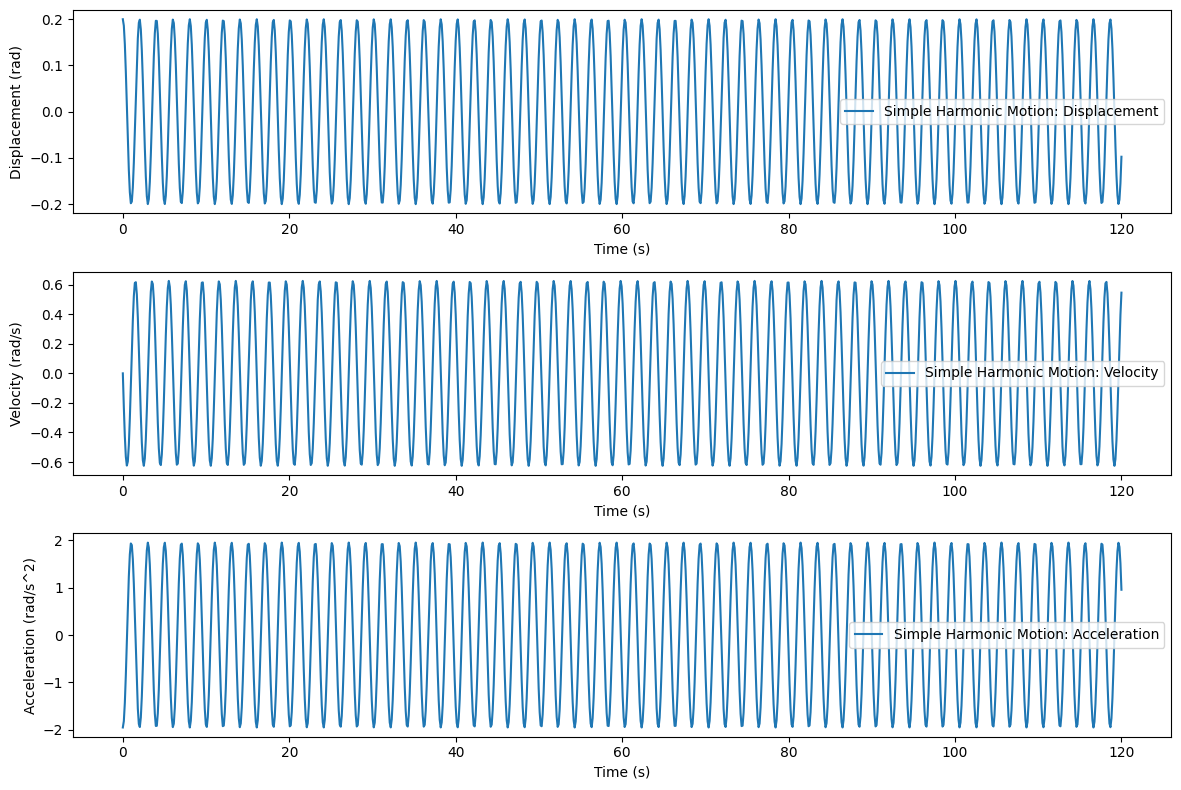

Low Damping: Period: 1.9219 s, Frequency: 0.5203 Hz
Damping Ratio: 0.0080


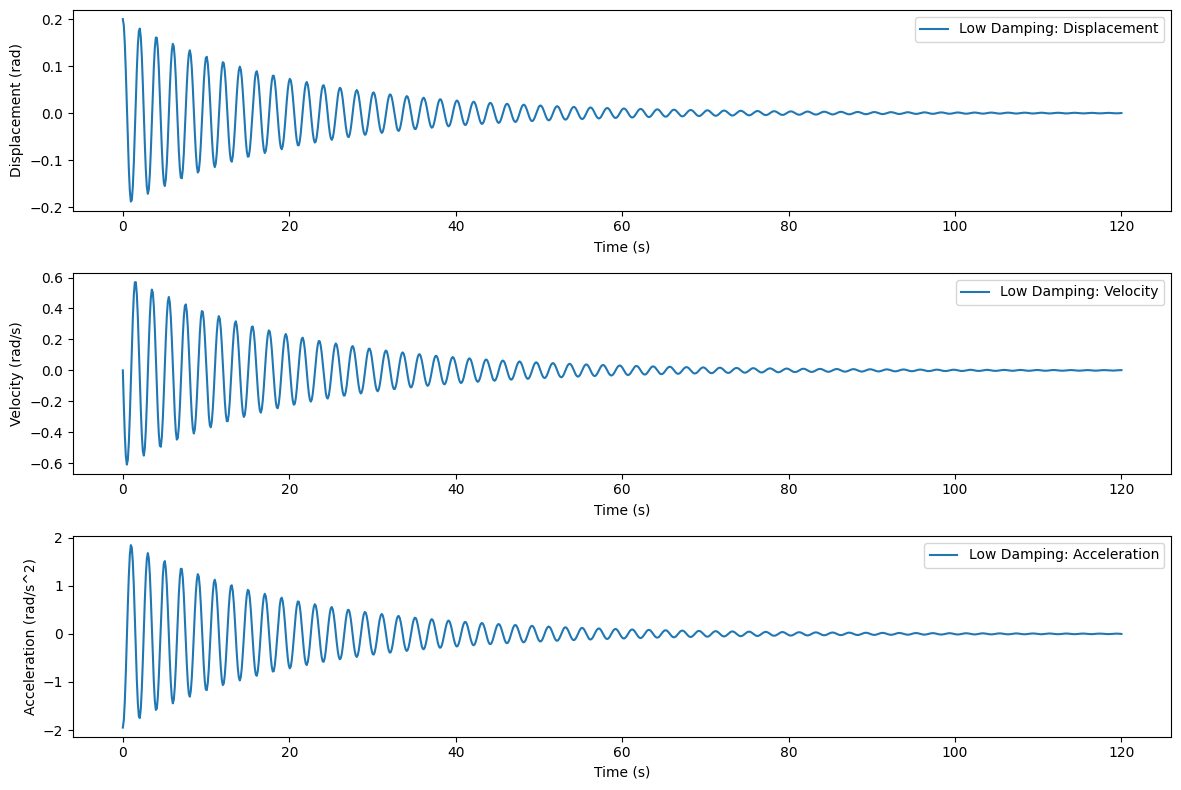

Critical Damping: Period: nan s, Frequency: nan Hz
Damping Ratio: 0.5000


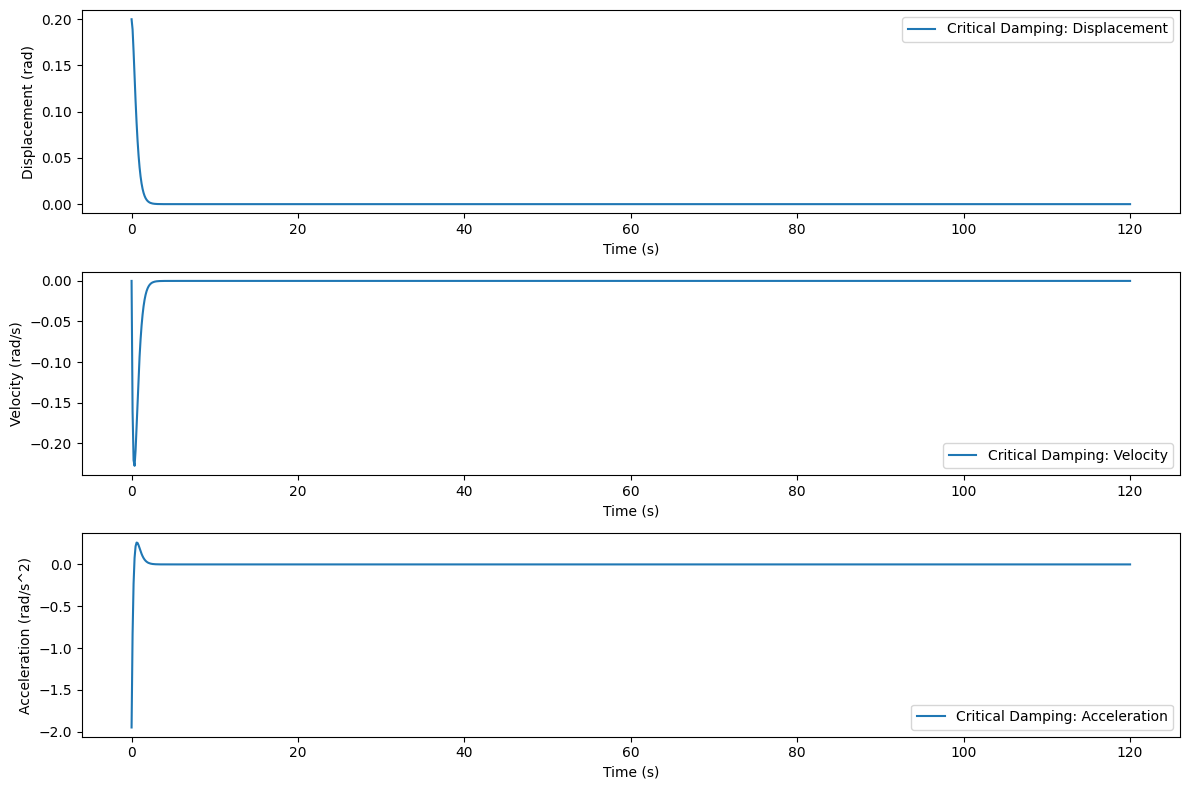

High Damping: Period: 0.4805 s, Frequency: 2.0813 Hz
Damping Ratio: 1.0000


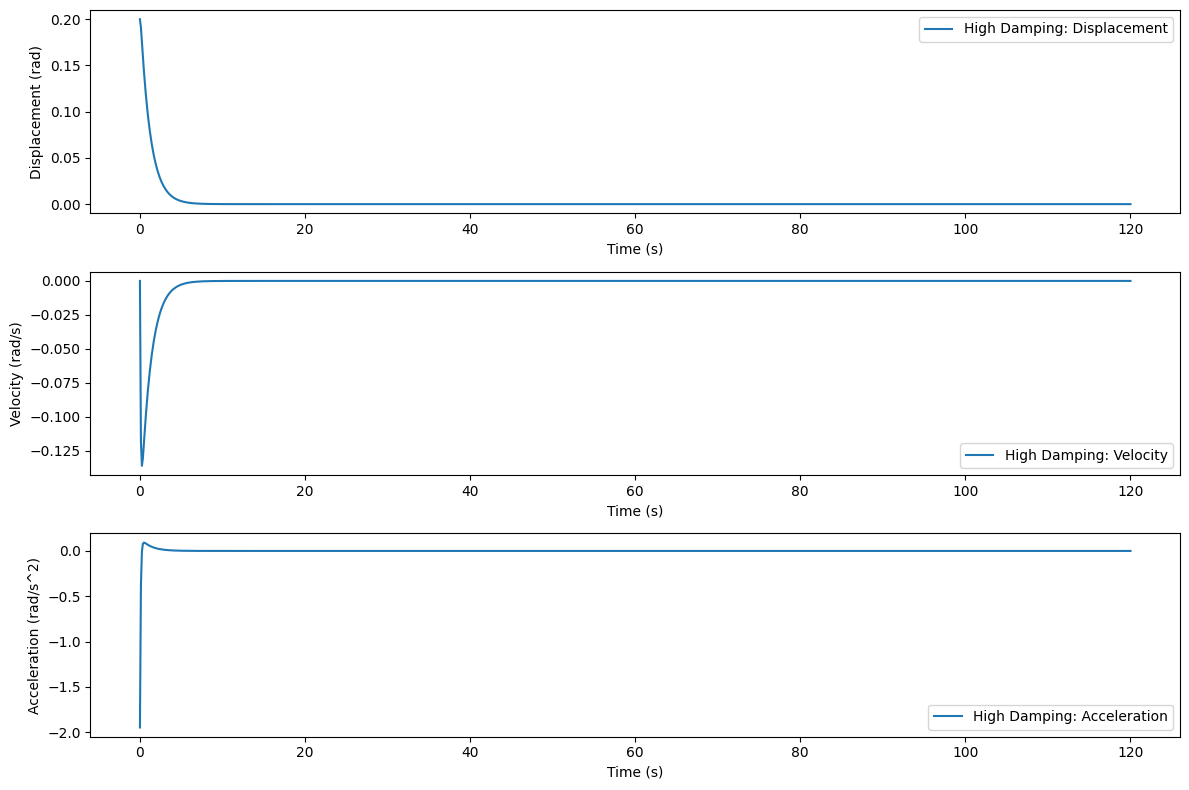

Low Damping Forced: Period: 2.0420 s, Frequency: 0.4897 Hz


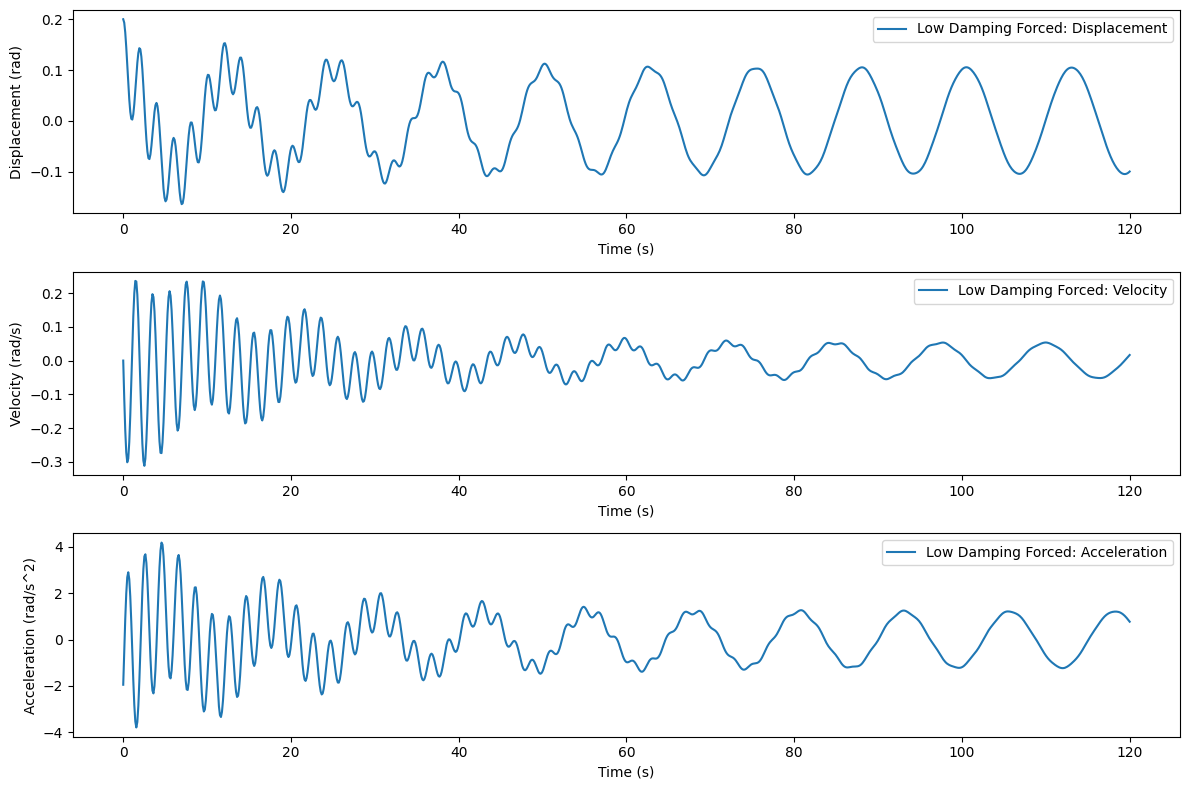

Critical Damping Forced: Period: 2.4024 s, Frequency: 0.4163 Hz


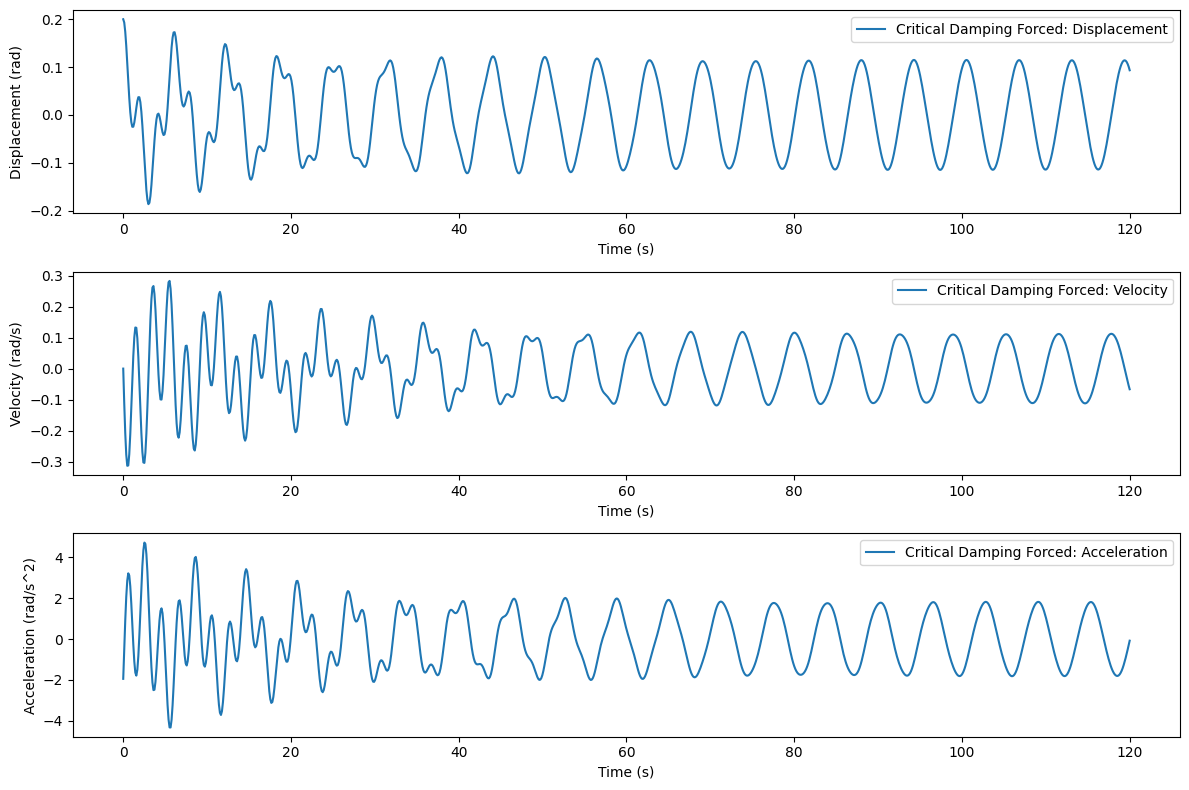

High Damping Forced: Period: 2.1622 s, Frequency: 0.4625 Hz


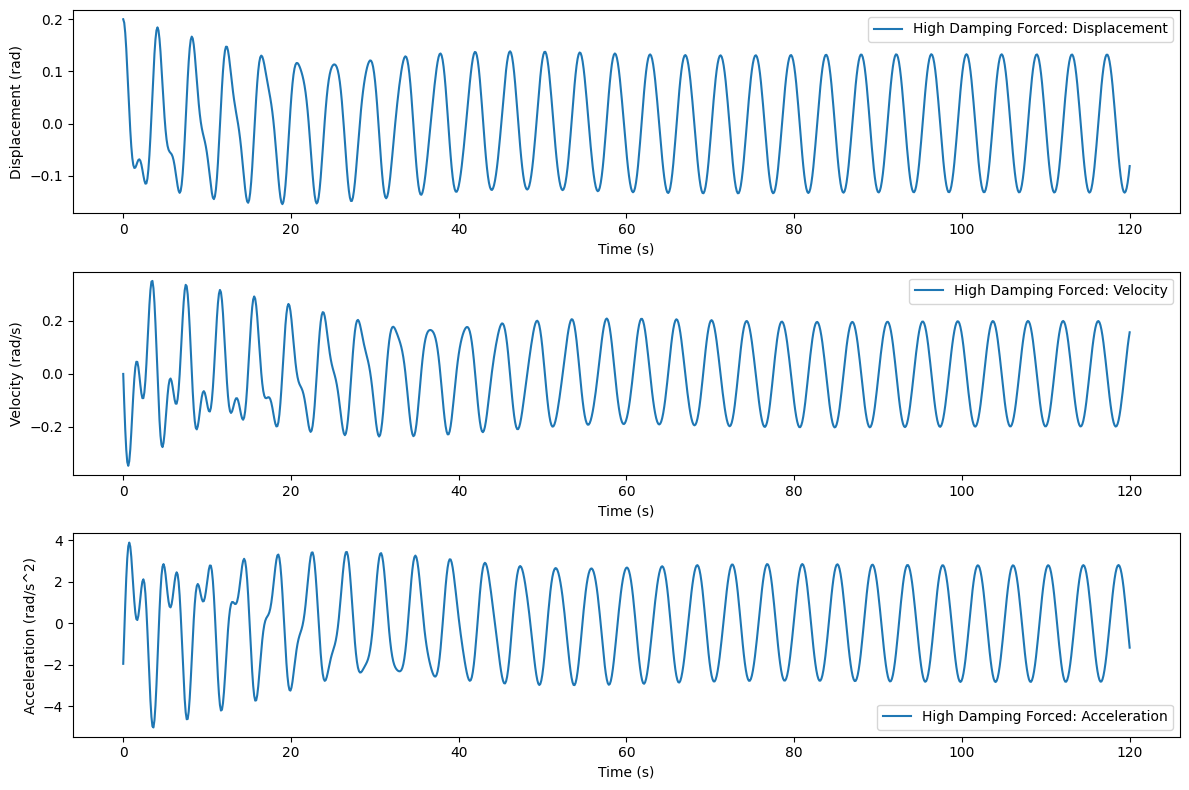

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import find_peaks

## Constants
g = 9.81  ## Acceleration due to gravity in m/s^2
L = 1.0   ## Length of the pendulum in meters
theta0 = 0.2  ## Initial angle in radians (small angle approximation)
omega0 = np.sqrt(g / L)  ## Natural frequency of the pendulum (SHM)
time = np.linspace(0, 120, 1000)  ## Time array for plotting

## Function to compute the equations of motion for SHM and damped/forced oscillations
def equation_of_motion(y, t, gamma, omega_ext, F_ext, damping_type):
    theta, omega = y
    if damping_type == "damped":
        ## Damped harmonic oscillator (under small damping conditions)
        dydt = [omega, -2*gamma*omega - omega0**2 * np.sin(theta)]
    elif damping_type == "forced":
        ## Forced harmonic oscillator
        dydt = [omega, -2*gamma*omega - omega0**2 * np.sin(theta) + F_ext * np.cos(omega_ext * t)]
    else:
        ## Simple Harmonic Oscillator (SHM)
        dydt = [omega, -omega0**2 * np.sin(theta)]
    return dydt

## Function to simulate SHM, damped, and forced oscillations
def simulate_oscillation(damping_type, gamma=0, omega_ext=0, F_ext=0):
    ## Initial conditions: [initial angle, initial angular velocity]
    y0 = [theta0, 0.0]
    ## Solve ODE for the given damping type
    sol = odeint(equation_of_motion, y0, time, args=(gamma, omega_ext, F_ext, damping_type))
    return sol

## Function to calculate period, frequency, and damping ratio
def calculate_parameters(time, theta, damping_type, gamma=None):
    ## Find the peaks in the displacement (for oscillation period)
    peaks, _ = find_peaks(theta)

    if len(peaks) > 1:
        ## Calculate the time period based on peak-to-peak distance
        period = time[peaks[1]] - time[peaks[0]]
        frequency = 1 / period
    else:
        ## If not enough peaks, return NaN (or we can return a fixed value like zero for no oscillations)
        period = np.nan
        frequency = np.nan

    if damping_type == "damped" and gamma is not None:
    ## Calculate the damping ratio for damped oscillations (using gamma)
      damping_ratio = gamma / (2 * np.sqrt(g * L))
    else:
      damping_ratio = np.nan

    return period, frequency, damping_ratio

## Plotting function for displacement, velocity, and acceleration
def plot_oscillations(sol, damping_type, damping_label=""):
    ## Extract solutions
    theta = sol[:, 0]
    omega = sol[:, 1]
    acceleration = -omega0**2 * np.sin(theta) if damping_type == "shm" else -omega0**2 * np.sin(theta) - 2 * gamma * omega

    ## Calculate parameters (period, frequency, damping_ratio)
    period, frequency, damping_ratio = calculate_parameters(time, theta, damping_type, gamma if damping_type == "damped" else None)

    ## Display calculated parameters
    print(f"{damping_label}: Period: {period:.4f} s, Frequency: {frequency:.4f} Hz")
    if not np.isnan(damping_ratio):
        print(f"Damping Ratio: {damping_ratio:.4f}")

    ## Plotting the results
    plt.figure(figsize=(12, 8))

    ## Displacement vs Time
    plt.subplot(3, 1, 1)
    plt.plot(time, theta, label=f"{damping_label}: Displacement")
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement (rad)")
    plt.legend(loc="best")

    ## Velocity vs Time
    plt.subplot(3, 1, 2)
    plt.plot(time, omega, label=f"{damping_label}: Velocity")
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (rad/s)")
    plt.legend(loc="best")

    ## Acceleration vs Time
    plt.subplot(3, 1, 3)
    plt.plot(time, acceleration, label=f"{damping_label}: Acceleration")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (rad/s^2)")
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

## SHM: Simple Harmonic Motion (no damping, no driving force)
sol_shm = simulate_oscillation("shm")

## Plot Simple Harmonic Motion
plot_oscillations(sol_shm, "shm", "Simple Harmonic Motion")

## Damped Harmonic Oscillations with low, critical, and high damping
gamma_values = [0.05, omega0, 2 * omega0]
damping_labels = ["Low Damping", "Critical Damping", "High Damping"]

for gamma, label in zip(gamma_values, damping_labels):
    sol_damped = simulate_oscillation("damped", gamma=gamma)
    plot_oscillations(sol_damped, "damped", label)

## Forced Harmonic Oscillations with low, critical, and high damping
omega_ext_values = [0.5, 1.0, 1.5]
F_ext = 1.0

for omega_ext, label in zip(omega_ext_values, ["Low Damping Forced", "Critical Damping Forced", "High Damping Forced"]):
    sol_forced = simulate_oscillation("forced", gamma=0.05, omega_ext=omega_ext, F_ext=F_ext)
    plot_oscillations(sol_forced, "forced", label)